## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [2]:
df = pd.read_csv("data/mortgage_covenant_data.csv")
df

,activity_year,census_tract,derived_race,action_taken,loan_amount,property_value,income,interest_rate,tract_minority_population_percent,tract_to_msa_income_percentage,denial_reason-1,covenant_count,was_approved,covenant_density
0,2023,2.703706e+10,Race Not Available,6,185000.0,195000.0,NaN,6.125,40.37,73.48,10,0.0,False,NaN
1,2023,2.714103e+10,Race Not Available,6,375000.0,385000.0,NaN,6.625,10.64,121.26,10,0.0,False,NaN
2,2023,2.702395e+10,Race Not Available,6,105000.0,105000.0,NaN,6.125,8.92,90.13,10,0.0,False,NaN
3,2023,2.717110e+10,Race Not Available,6,285000.0,285000.0,NaN,6.750,13.27,104.37,10,0.0,False,NaN
4,2023,2.715948e+10,Race Not Available,6,175000.0,175000.0,NaN,6.875,5.87,82.22,10,0.0,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100926,2023,2.700902e+10,Race Not Available,6,255000.0,265000.0,NaN,6.125,4.88,106.18,10,0.0,False,NaN
100927,2023,2.706778e+10,Race Not Available,6,185000.0,335000.0,NaN,6.125,46.58,74.68,10,0.0,False,NaN
100928,2023,2.714948e+10,Race Not Available,6,65000.0,75000.0,NaN,6.750,20.14,118.83,10,0.0,False,NaN
100929,2023,2.705913e+10,Race Not Available,6,545000.0,525000.0,NaN,5.000,6.84,90.07,10,0.0,False,NaN


## Missing Values

In [3]:
# Count missing values in each column
missing_counts = df.isnull().sum()
print("Missing Values per Column:\n", missing_counts)

# Total missing values in the dataset
total_missing = df.isnull().sum().sum()
print("\nTotal Missing Values:", total_missing)

Missing Values per Column:
 activity_year                            0
census_tract                          1016
derived_race                             0
action_taken                             0
loan_amount                              0
property_value                       17440
income                               12731
interest_rate                        22806
tract_minority_population_percent        0
tract_to_msa_income_percentage           0
denial_reason-1                          0
covenant_count                           0
was_approved                             0
covenant_density                     89762
dtype: int64

Total Missing Values: 143755


In [4]:
df = df[df['derived_race'] != 'Race Not Available']
df['was_approved'] = df['was_approved'].astype(int)

C:\Users\mkemb\AppData\Local\Temp\ipykernel_49584\3078008246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['was_approved'] = df['was_approved'].astype(int)


In [5]:
df = df.dropna(subset=["covenant_density","loan_amount", "income", "interest_rate"])

In [6]:
# Median imputation for property_value and income
df["property_value"].fillna(df["property_value"].median(), inplace=True)
df["income"].fillna(df["income"].median(), inplace=True)

# Mean imputation for other numeric columns
df["interest_rate"].fillna(df["interest_rate"].mean(), inplace=True)
df["tract_minority_population_percent"].fillna(df["tract_minority_population_percent"].mean(), inplace=True)
df["tract_to_msa_income_percentage"].fillna(df["tract_to_msa_income_percentage"].mean(), inplace=True)

C:\Users\mkemb\AppData\Local\Temp\ipykernel_49584\2069921767.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["property_value"].fillna(df["property_value"].median(), inplace=True)
C:\Users\mkemb\AppData\Local\Temp\ipykernel_49584\2069921767.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [7]:
df["census_tract"].fillna(df["census_tract"].mode()[0], inplace=True)
df["denial_reason-1"].fillna(df["denial_reason-1"].mode()[0], inplace=True)

C:\Users\mkemb\AppData\Local\Temp\ipykernel_49584\452086747.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["census_tract"].fillna(df["census_tract"].mode()[0], inplace=True)
C:\Users\mkemb\AppData\Local\Temp\ipykernel_49584\452086747.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [8]:
print("Missing Values After Cleaning:\n", df.isnull().sum())

Missing Values After Cleaning:
 activity_year                        0
census_tract                         0
derived_race                         0
action_taken                         0
loan_amount                          0
property_value                       0
income                               0
interest_rate                        0
tract_minority_population_percent    0
tract_to_msa_income_percentage       0
denial_reason-1                      0
covenant_count                       0
was_approved                         0
covenant_density                     0
dtype: int64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6721 entries, 363 to 100922
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   activity_year                      6721 non-null   int64  
 1   census_tract                       6721 non-null   float64
 2   derived_race                       6721 non-null   object 
 3   action_taken                       6721 non-null   int64  
 4   loan_amount                        6721 non-null   float64
 5   property_value                     6721 non-null   float64
 6   income                             6721 non-null   float64
 7   interest_rate                      6721 non-null   float64
 8   tract_minority_population_percent  6721 non-null   float64
 9   tract_to_msa_income_percentage     6721 non-null   float64
 10  denial_reason-1                    6721 non-null   int64  
 11  covenant_count                     6721 non-null   float6

In [10]:
print(df.columns)  # Ensure "race" is listed exactly as expected

Index(['activity_year', 'census_tract', 'derived_race', 'action_taken',
       'loan_amount', 'property_value', 'income', 'interest_rate',
       'tract_minority_population_percent', 'tract_to_msa_income_percentage',
       'denial_reason-1', 'covenant_count', 'was_approved',
       'covenant_density'],
      dtype='object')


In [11]:
# Group by 'race' and get summary statistics of 'loan_amount'
summary_stats = df.groupby("derived_race")["loan_amount"].describe()
print(summary_stats)

                                            count           mean  \
derived_race                                                       
2 or more minority races                     12.0  271666.666667   
American Indian or Alaska Native             57.0  280263.157895   
Asian                                       417.0  346702.637890   
Black or African American                   483.0  251128.364389   
Joint                                       297.0  363316.498316   
Native Hawaiian or Other Pacific Islander     8.0  226250.000000   
White                                      5447.0  367276.482467   

                                                     std      min       25%  \
derived_race                                                                  
2 or more minority races                   127445.769810  15000.0  195000.0   
American Indian or Alaska Native           169021.398298   5000.0  185000.0   
Asian                                      278978.610666   5000.0  2250

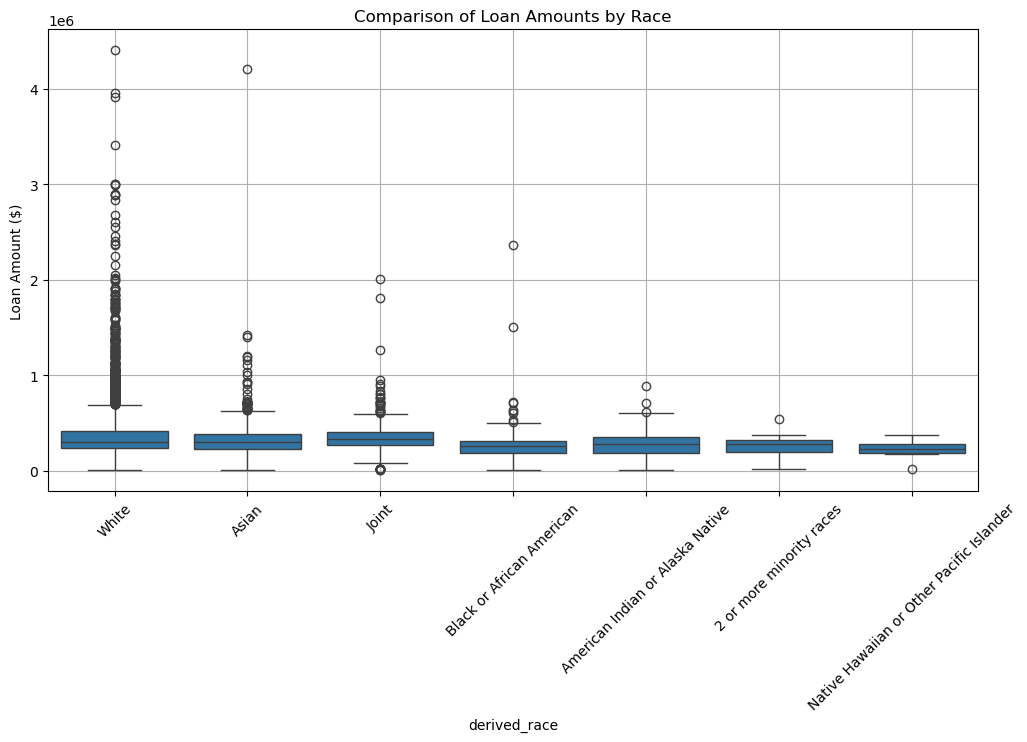

In [12]:
# Boxplot of loan_amount by race
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="derived_race", y="loan_amount")

# Labels and title
plt.xlabel("derived_race")
plt.ylabel("Loan Amount ($)")
plt.title("Comparison of Loan Amounts by Race")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(True)

# Show plot
plt.show()

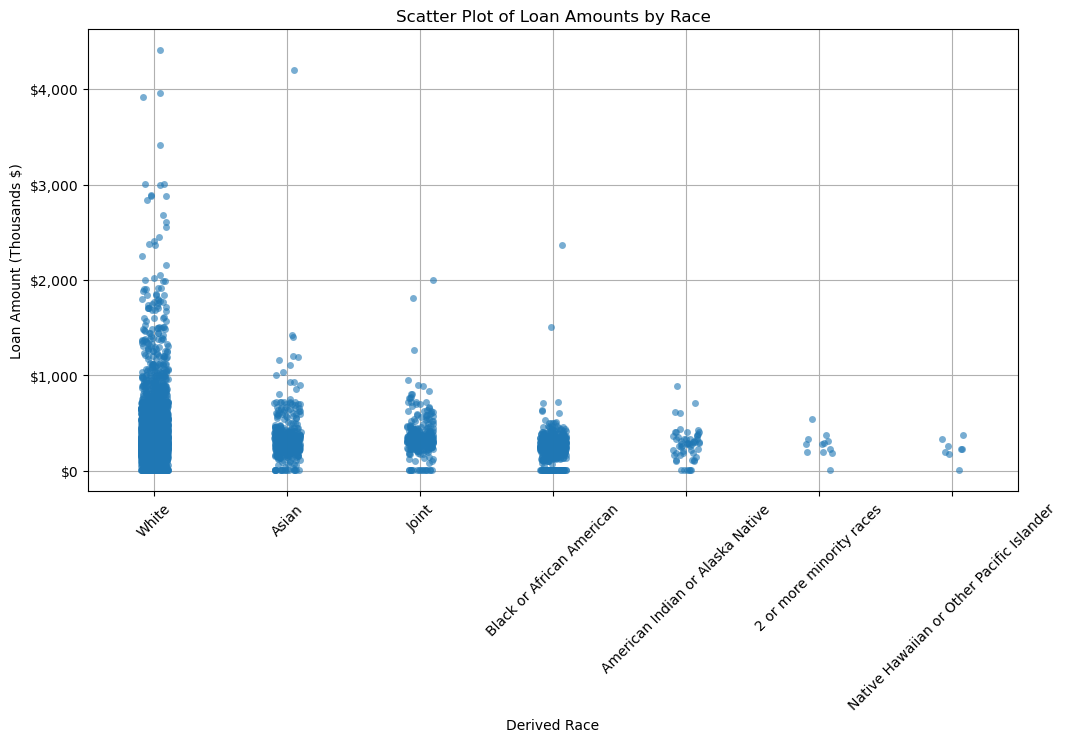

In [13]:
# Scatter plot of loan_amount by race
plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x="derived_race", y="loan_amount", jitter=True, alpha=0.6)

# Add labels and title
plt.xlabel("Derived Race")
plt.ylabel("Loan Amount (Thousands $)")  # Updated label to reflect thousands
plt.title("Scatter Plot of Loan Amounts by Race")

# Modify y-axis to show loan amounts in thousands
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x / 1000))))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show grid for better visualization
plt.grid(True)

# Show the plot
plt.show()


derived_race
2 or more minority races                     271666.666667
American Indian or Alaska Native             280263.157895
Asian                                        346702.637890
Black or African American                    251128.364389
Joint                                        363316.498316
Native Hawaiian or Other Pacific Islander    226250.000000
White                                        367276.482467
Name: loan_amount, dtype: float64


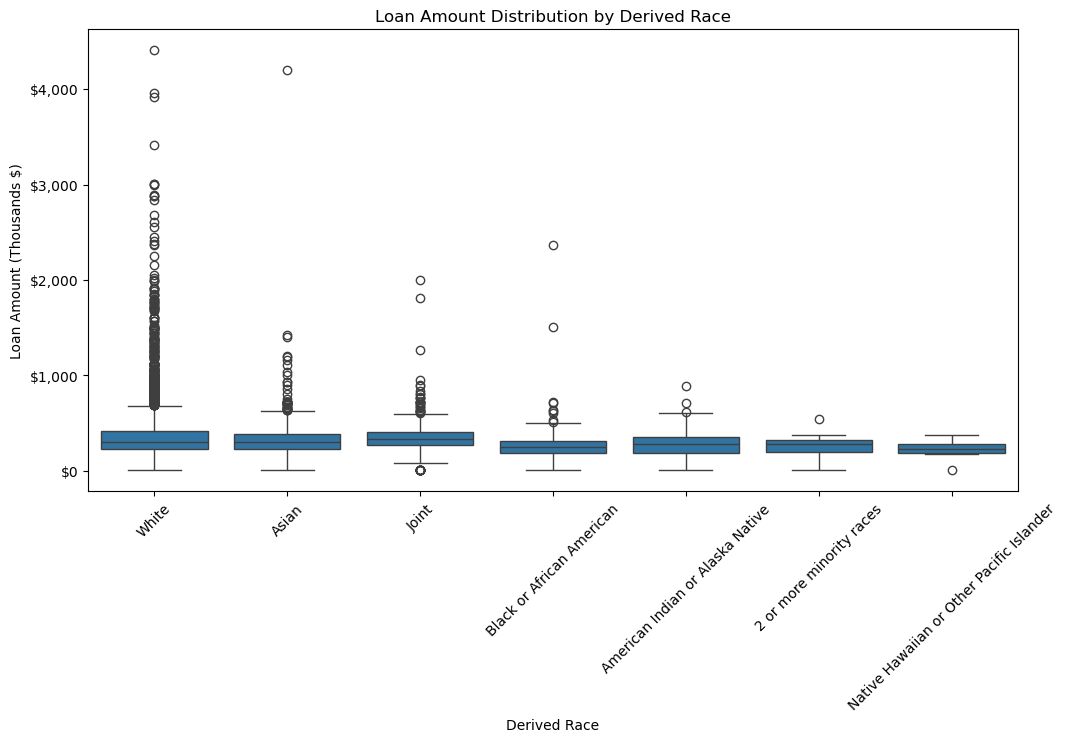

In [14]:
# Group by 'derived_race' and calculate the mean loan amount
loan_amount_by_race = df.groupby("derived_race")["loan_amount"].mean()
print(loan_amount_by_race)

# Boxplot to visualize loan amount distribution by race
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with custom size
plt.figure(figsize=(12, 6))

# Boxplot to visualize the loan amount distribution by derived race
sns.boxplot(data=df, x="derived_race", y="loan_amount")

# Add labels and title to the plot
plt.xlabel("Derived Race")
plt.ylabel("Loan Amount (Thousands $)")  # Update label to reflect thousands
plt.title("Loan Amount Distribution by Derived Race")

# Divide loan amount by 1000 for the y-axis
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x / 1000))))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


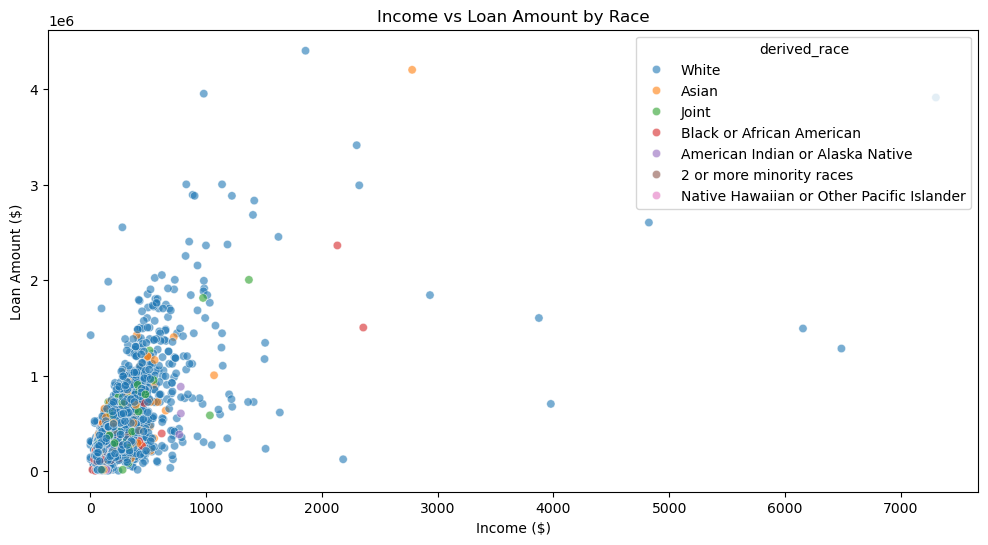

Correlation between Income and Loan Amount: 0.6278253482244334


In [15]:
# Scatter plot to check the relationship between income and loan amount
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="income", y="loan_amount", hue="derived_race", alpha=0.6)
plt.xlabel("Income ($)")
plt.ylabel("Loan Amount ($)")
plt.title("Income vs Loan Amount by Race")
plt.show()

# Correlation between income and loan amount
correlation_income_loan = df["income"].corr(df["loan_amount"])
print(f"Correlation between Income and Loan Amount: {correlation_income_loan}")

derived_race
2 or more minority races                     0.916667
American Indian or Alaska Native             0.842105
Asian                                        0.896882
Black or African American                    0.792961
Joint                                        0.915825
Native Hawaiian or Other Pacific Islander    0.750000
White                                        0.916835
Name: was_approved, dtype: float64


C:\Users\mkemb\AppData\Local\Temp\ipykernel_49584\4088276129.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="derived_race", y="was_approved", palette="Set2")


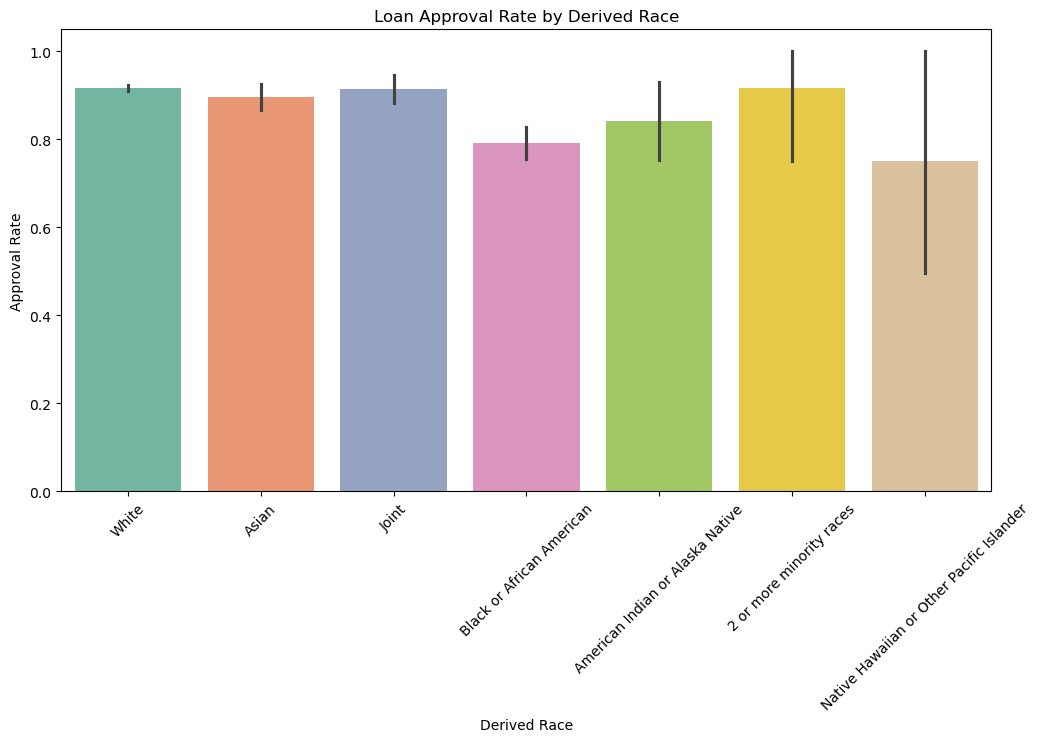

In [16]:
# Calculate the approval rate for each race
approval_rate_by_race = df.groupby("derived_race")["was_approved"].mean()
print(approval_rate_by_race)

# Bar plot of loan approval rates by race
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="derived_race", y="was_approved", palette="Set2")
plt.xlabel("Derived Race")
plt.ylabel("Approval Rate")
plt.title("Loan Approval Rate by Derived Race")
plt.xticks(rotation=45)
plt.show()